In [2]:
import math
import os
import sys
import re
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
os.getcwd()

'C:\\Users\\abhis\\Desktop\\Diveplane Task'

In [4]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'data.csv',
 'diveplanedatascientistposition.zip',
 'Diverplane Unsupervised Learning.ipynb',
 'Diverplane.ipynb',
 'Problem_Statement.docx',
 'Untitled.ipynb']

In [5]:
df = pd.read_csv("data.csv")

In [95]:
df.head()

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments,Adderall,Antibio,Opioid
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0,NaN,609.750000,1.0
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN,114.0,5.000000,NaN
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN,NaN,1599.000000,NaN
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN,120.0,4.500000,NaN
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0,NaN,652.423077,2.0


In [7]:
print("Adderall Patients Maximum Value:", df['AdderallPatients'].max(skipna = True))
print("Adderall Patients Minimum Value:", df['AdderallPatients'].min(skipna = True))
print("Adderall Payments Maximum Value:", df['AdderallPayments'].max(skipna = True))
print("Adderall Payments Minimum Value:", df['AdderallPayments'].min(skipna = True))

Adderall Patients Maximum Value: 341.0
Adderall Patients Minimum Value: 1.0
Adderall Payments Maximum Value: 1732264.0
Adderall Payments Minimum Value: -11771.0


In [8]:
print("Antibio Patients Maximum Value:", df['AntibioPatients'].max(skipna = True))
print("Antibio Patients Minimum Value:", df['AntibioPatients'].min(skipna = True))
print("Antibio Payments Maximum Value:", df['AntibioPayments'].max(skipna = True))
print("Antibio Payments Minimum Value:", df['AntibioPayments'].min(skipna = True))

Antibio Patients Maximum Value: 285.0
Antibio Patients Minimum Value: 1.0
Antibio Payments Maximum Value: 2423404.0
Antibio Payments Minimum Value: -9400.0


In [9]:
print("Opioid Patients Maximum Value:", df['OpioidPatients'].max(skipna = True))
print("Opioid Patients Minimum Value:", df['OpioidPatients'].min(skipna = True))
print("Opioid Payments Maximum Value:", df['OpioidPayments'].max(skipna = True))
print("Opioid Payments Minimum Value:", df['OpioidPayments'].min(skipna = True))

Opioid Patients Maximum Value: 318.0
Opioid Patients Minimum Value: 0.0
Opioid Payments Maximum Value: 2823021.0
Opioid Payments Minimum Value: -10.0


In [10]:
len(df.ID.unique())

3010

In [11]:
len(df)

42074

In [12]:
df.ID.unique()

array(['6vFQfkVIyHglLHjv', '1wyQjXUjUljiLEyP', 'y71QQKRICtTBXoGG', ...,
       'h72fi2iG9YIiyGta', 'ApPpPpPvWUqHMxP5', '6d6ujOAwj6TKEbrN'],
      dtype=object)

In [13]:
df.groupby('ID').idxmax()

,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments
ID,,,,,,
00uSjJiSgBOBO3XX,NaN,NaN,681.0,681.0,680.0,680.0
02apJGe9GtE4LfxZ,19648.0,19662.0,19639.0,19653.0,19663.0,19646.0
06oajfabd6FZ5cDn,14577.0,14561.0,14570.0,14573.0,14572.0,14583.0
08LqeNKEAgkxALX6,377.0,377.0,377.0,377.0,377.0,377.0
09IWkEKKORhZAFkc,30034.0,30028.0,30029.0,30029.0,30036.0,30046.0
0AlYY1WhJ6e4xcCd,32168.0,32169.0,32181.0,32182.0,32174.0,32179.0
0AnEn67D4RmPX1Aj,25179.0,25188.0,25201.0,25201.0,25173.0,25172.0
0AyZrwgCKZkyg0Bf,16925.0,16925.0,16926.0,16922.0,16919.0,16919.0
0BD7oV92Wy2v4tZP,32293.0,32293.0,32293.0,32293.0,NaN,NaN


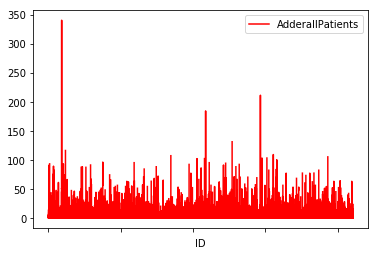

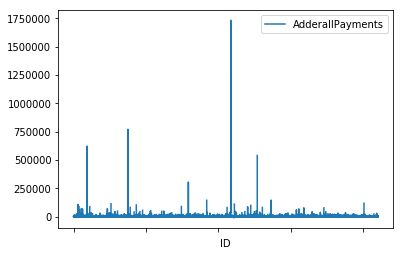

42074


In [14]:
df.plot(x="ID", y = "AdderallPatients", color = "red")
df.plot(x="ID", y = "AdderallPayments")

plt.show()
print(len(df))

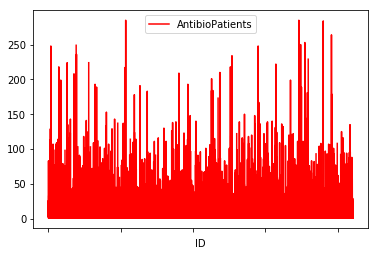

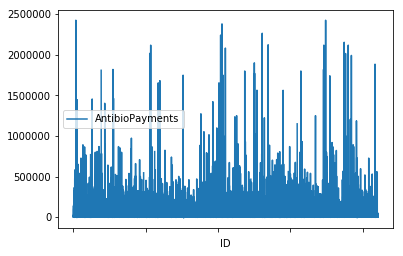

In [15]:
df.plot(x="ID", y = "AntibioPatients", color = "red")
df.plot(x="ID", y = "AntibioPayments")

plt.show()

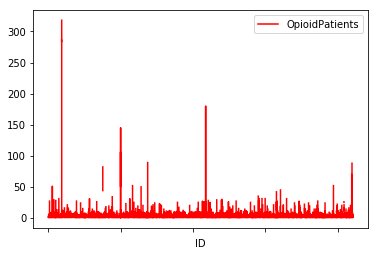

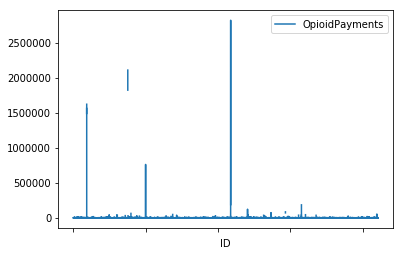

In [16]:
df.plot(x="ID", y = "OpioidPatients", color = "red")
df.plot(x="ID", y = "OpioidPayments")
plt.show()

In [17]:
df["Adderall"] = df["AdderallPayments"]/df["AdderallPatients"]
df.head()

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments,Adderall
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0,NaN
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN,114.0
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN,NaN
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN,120.0
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0,NaN


In [18]:
df.insert(9, "Antibio", 0)
df["Antibio"] = df["AntibioPayments"]/df["AntibioPatients"]
df.head()

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments,Adderall,Antibio
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0,NaN,609.750000
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN,114.0,5.000000
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN,NaN,1599.000000
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN,120.0,4.500000
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0,NaN,652.423077


In [19]:
#df.insert(10, "Opioid", 0)
df["Opioid"] = df["OpioidPayments"]/df["OpioidPatients"]
df.head(20)

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments,Adderall,Antibio,Opioid
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0,NaN,609.750000,1.0
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN,114.000000,5.000000,NaN
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN,NaN,1599.000000,NaN
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN,120.000000,4.500000,NaN
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0,NaN,652.423077,2.0
5,6vFQfkVIyHglLHjv,2015-06,14.0,1753.0,2.0,3603.0,NaN,NaN,125.214286,1801.500000,NaN
6,1wyQjXUjUljiLEyP,2015-04,1.0,1500.0,5.0,72156.0,1.0,461.0,1500.000000,14431.200000,461.0
7,1wyQjXUjUljiLEyP,2015-05,1.0,8.0,8.0,5089.0,1.0,37.0,8.000000,636.125000,37.0
8,1wyQjXUjUljiLEyP,2015-06,NaN,NaN,5.0,40938.0,NaN,NaN,NaN,8187.600000,NaN
9,1wyQjXUjUljiLEyP,2015-07,7.0,151.0,3.0,292.0,2.0,24.0,21.571429,97.333333,12.0


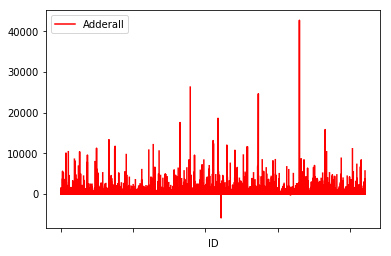

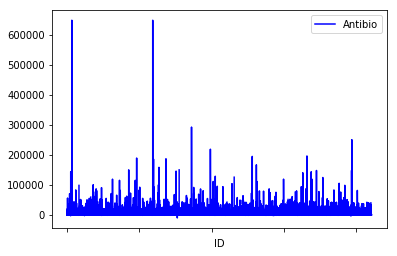

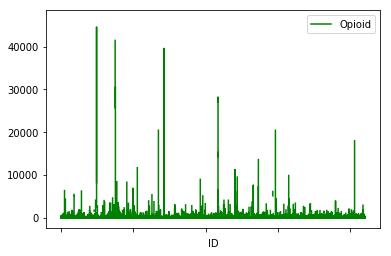

In [20]:
df.plot(x="ID", y = "Adderall", color = "red")
df.plot(x="ID", y = "Antibio", color = "blue")
df.plot(x="ID", y = "Opioid", color = "green")
plt.show()

313


313

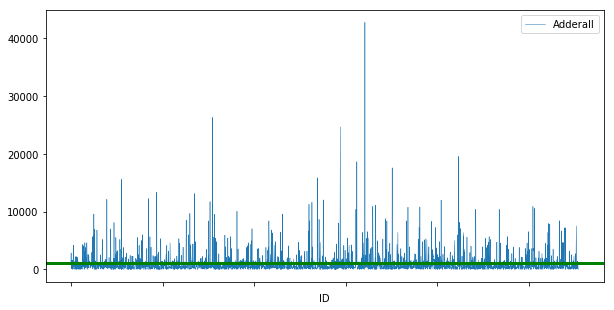

In [138]:
#Adderall Drug Overprescribing
#Total companies overprescribing: 313 for 2 * mean

%matplotlib inline
df2 = df[['ID' ,'Adderall']].dropna().groupby(['ID']).max()
print(len(df2[df2.Adderall > 2 * df2.mean()[0]]))
df2.plot(linewidth = 0.5, figsize = (10, 5))
plt.axhline(df2["Adderall"].mean(), color="green", linewidth = 3)
df2['Adderall'].mean()
len(df2)

df21=df2[df2.Adderall > 2 * df2.mean()[0]] #mean value can be changed by multiplying df.mean() with 1, 1.5, and 2
len(df21)

In [108]:
df21.head(1000)

,Adderall
ID,
06oajfabd6FZ5cDn,2850.000000
09IWkEKKORhZAFkc,1518.500000
0AnEn67D4RmPX1Aj,1117.736842
0BWlKm9RGcxA5kuy,1239.500000
0C3sYZ8TP1NAAr8K,1646.250000
0KBWPdf9q61W0w0N,4226.750000
0RBo7wYrs4jOdYC9,1356.333333
0W4hBCeMlK6bhilw,1800.250000
0Z6RwbkQPqpzw7iF,2216.333333


In [123]:
df21.to_csv('Adderall_1.5.csv')


334


334

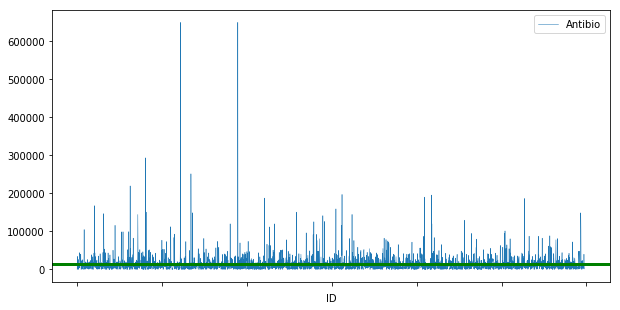

In [139]:
#Antibio Drug Overprescribing
#Total companies overprescribing: 334

%matplotlib inline
df3 = df[['ID' ,'Antibio']].dropna().groupby(['ID']).max()
print(len(df3[df3.Antibio > 2*df3.mean()[0]]))
df3.plot(linewidth = 0.5, figsize = (10, 5))
#plt.axhline(df2["Adderall"].quantile(0.9), color="green")
plt.axhline(df3["Antibio"].mean(), color="green", linewidth = 3)
df3['Antibio'].mean()
df31=df3[df3.Antibio > 2 *df3.mean()[0]] #mean value can be changed by multiplying df.mean() with 1, 1.5, 2
len(df31)

In [111]:
df31.head()

,Antibio
ID,
02apJGe9GtE4LfxZ,34451.000000
06oajfabd6FZ5cDn,27282.571429
0AnEn67D4RmPX1Aj,26281.666667
0HxubTX9BB8tkIrx,16782.000000
0JH3yCnkQMUmYbv0,44113.300000


In [124]:
df31.to_csv('Antibio_1.5.csv')

217

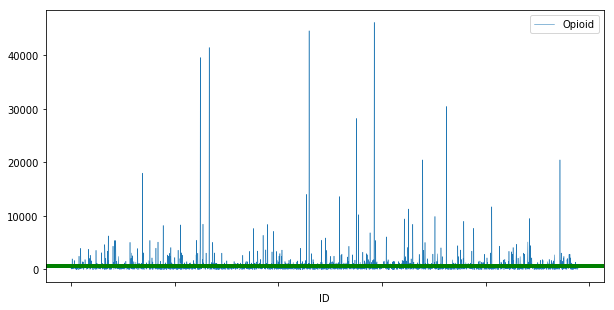

In [140]:
#Opioid Drug Overprescribing
#Total companies overprescribing: 217

%matplotlib inline
df4 = df[['ID' ,'Opioid']].dropna().groupby(['ID']).max()
df4[df4.Opioid >= 1000000] = 0
df4.plot(linewidth = 0.5, figsize = (10, 5))
plt.axhline(df4["Opioid"].mean(), color="green", linewidth = 4)
df4['Opioid'].mean()
df41=df4[df4.Opioid > 2*df4.mean()[0]]   #mean value can be changed by multiplying df.mean() with 1, 1.5, 2
len(df41)


In [141]:
df41.head()

,Opioid
ID,
0AnEn67D4RmPX1Aj,1983.000000
0QVUCexYHdZAGPyw,1676.500000
110TKLWVRN6gnPWn,2474.000000
1CzioLPTiyyFZ2zs,3957.000000
1qPZGtn1Wai2xxPW,1845.142857


In [125]:
df41.to_csv('Opioid_1.5.csv')

In [136]:
#Companies leniently overpresecribing all the drugs

lenientOverprescribing = [df21, df31, df41]
lenientOverprescribing
df6 = pd.concat(lenientOverprescribing, axis=1, join='inner')
df6.head(1000)

,Adderall,Antibio,Opioid
ID,,,
Xp8FikhA4Ed9CurD,4190.727273,37987.0,1495.666667
mHTQMzq42nggS4LT,3760.400000,37277.0,2058.000000
tdcQdMQI9RPWZPi4,2628.000000,34615.0,5131.166667
xydlxOWAKw4lMLtu,4703.000000,36366.0,2060.500000


In [126]:
df6.to_csv('Overprescribing_1.5_times.csv')


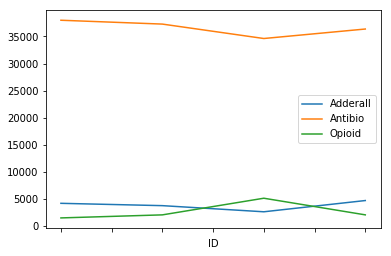

In [137]:
df6.plot()
